# Sklearn

## sklearn.tree

Docs: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

Examples: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

In [0]:
from matplotlib import pyplot as pltfrom 
from matplotlib.colors import ListedColormap

from sklearn.model_selection import cross_validate, train_test_split
from sklearn import linear_model, metrics, datasets, tree

In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data generation

In [0]:
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [0]:
classification_problem[0][:,0]

array([ 2.21886651,  2.07169996, -1.93977262,  2.08436759,  0.94998372,
       -0.3878893 ,  1.98118534,  1.65508134,  2.60996691, -0.29137472,
       -0.98418733, -0.15399877, -0.22167729,  2.88285048,  1.17459743,
       -0.31704075,  1.48023527,  1.51863252, -0.7044121 ,  1.06060558,
        3.04237626, -1.60671473, -0.2410213 ,  1.88783328,  0.1286542 ,
       -1.68428971, -0.7699091 ,  3.06365602, -1.06474935, -0.34416853,
        2.13404983,  1.12563852,  2.000055  ,  2.07135111,  0.80113229,
        2.62368333,  1.09390904, -0.1183851 ,  1.17333444, -1.1156508 ,
       -0.81128541, -0.28911786,  3.45454483,  0.02133037,  0.59841259,
        0.99792686, -0.85644943, -1.64094355,  1.61122064, -0.47741667,
       -1.10545981, -1.32837543, -1.40997215, -0.63517453, -1.66026857,
       -2.08667919, -1.01112963,  1.05504391,  1.56089307, -1.02077644,
        1.23337839,  1.82285256, -0.61454121,  0.06002548, -1.90919636,
        0.02749183,  1.2933655 , -0.79602966, -0.06295081,  0.50

In [0]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

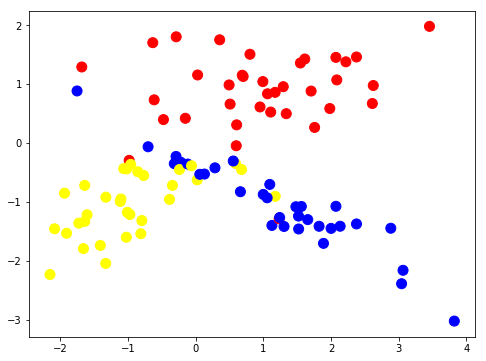

In [0]:
pylab.figure(figsize=(8,6))
pylab.scatter(classification_problem[0][:,0], classification_problem[0][:,1], 
              c=classification_problem[1], cmap=colors, s=100)

In [0]:
train_data, test_data, train_labels, test_labels = train_test_split(classification_problem[0], 
                                                                    classification_problem[1], 
                                                                    test_size = 0.3,
                                                                    random_state = 1)

### DecisionTreeClassifier Model

In [0]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [0]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.7666666666666667

In [0]:
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 1, 2, 0])

### Dividing surface

In [0]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [0]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

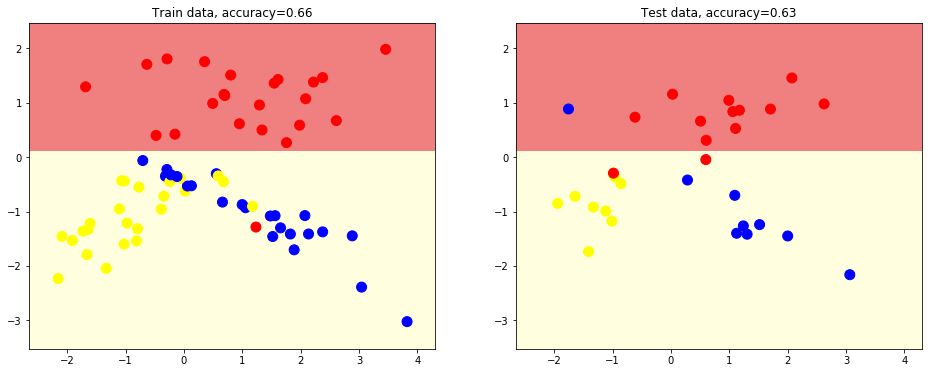

In [0]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

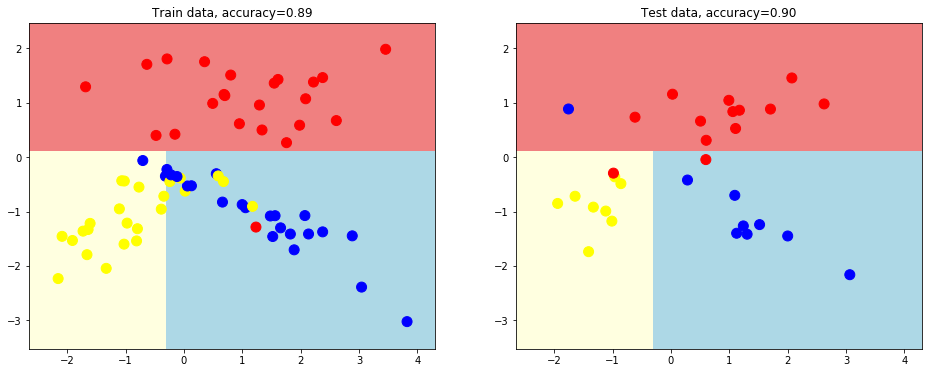

In [0]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 2),
                      train_data, train_labels, test_data, test_labels)

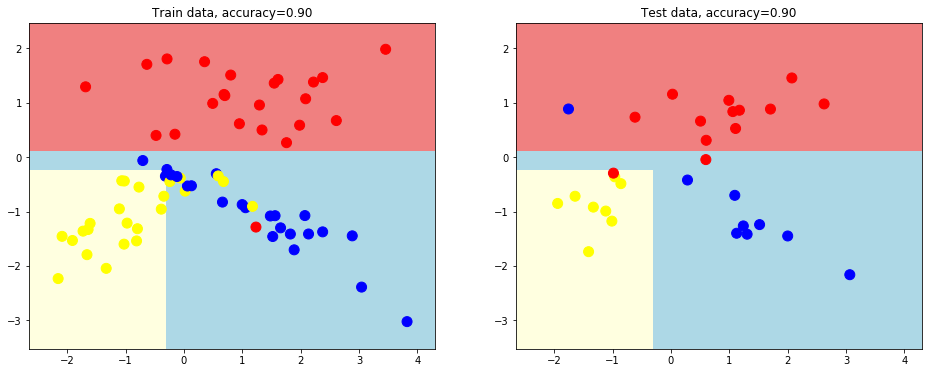

In [0]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 3),
                      train_data, train_labels, test_data, test_labels)

Let's overfit the tree - delete max_depth param from DecisionTreeClassifier:

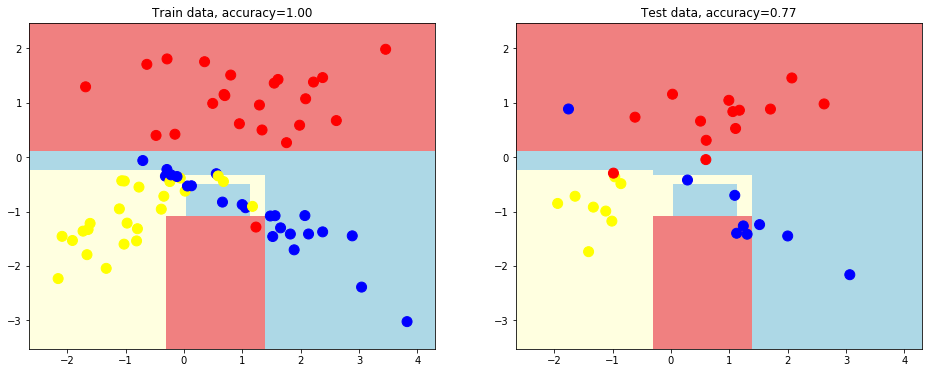

In [0]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1),
                      train_data, train_labels, test_data, test_labels)

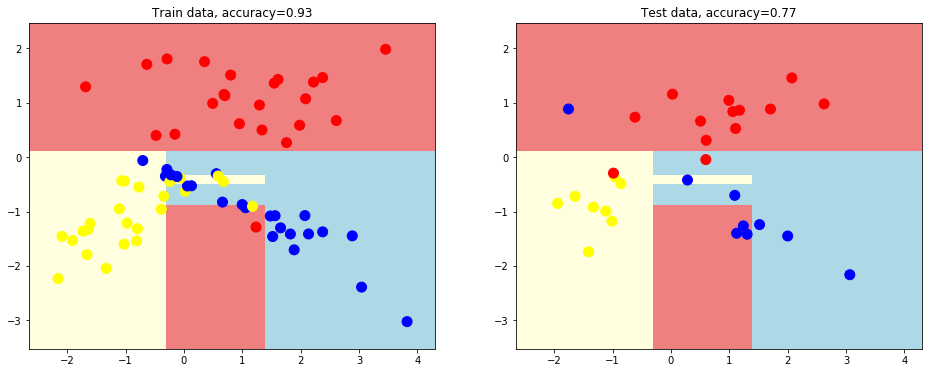

In [0]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 3), 
                      train_data, train_labels, test_data, test_labels)